In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/train.csv')
df.shape

(3719, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3719 non-null   object 
 1   Nifty500_PE         3719 non-null   float64
 2   Nifty500_PB         3719 non-null   float64
 3   Earning_Yields_%    3719 non-null   float64
 4   3M_Yield_India      3719 non-null   float64
 5   2Y_Yield_India      3719 non-null   float64
 6   10Y_Yield_India     3719 non-null   float64
 7   India_Yield_Spread  3719 non-null   float64
 8   10Y-3M_Yield_India  3719 non-null   float64
 9   10Y-2Y_Yield_India  3719 non-null   float64
 10  3M_Yield_US         3719 non-null   float64
 11  2Y_Yield_US         3719 non-null   float64
 12  10Y_Yield_US        3719 non-null   float64
 13  10Y-3M_Yield_US     3719 non-null   float64
 14  10Y-2Y_Yield_US     3719 non-null   float64
 15  pct_change          3719 non-null   float64
dtypes: flo

`no null values, clear from the above`

In [4]:
df.describe()

,Nifty500_PE,Nifty500_PB,Earning_Yields_%,3M_Yield_India,2Y_Yield_India,10Y_Yield_India,India_Yield_Spread,10Y-3M_Yield_India,10Y-2Y_Yield_India,3M_Yield_US,2Y_Yield_US,10Y_Yield_US,10Y-3M_Yield_US,10Y-2Y_Yield_US,pct_change
count,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000
mean,17.897389,2.820670,5.634743,6.924587,7.474265,8.098760,2.463514,1.173996,0.624894,2.047779,2.527878,3.929301,1.881834,1.401522,1.199757
std,3.524019,0.911581,1.096562,1.859880,3.976224,1.639999,2.234509,1.144642,3.586752,2.055110,1.974646,1.219498,1.211138,0.982218,1.195570
min,9.290000,1.280000,3.510000,3.000000,1.390000,4.960000,-3.310000,-2.910000,-196.700000,-0.010000,0.160000,1.390000,-0.850000,-0.950000,-0.181866
25%,15.505000,2.240000,4.820000,5.350000,6.040000,7.170000,1.010000,0.290000,0.270000,0.100000,0.590000,2.940000,0.900000,0.300000,0.465733
50%,17.800000,2.630000,5.440000,7.100000,7.460000,7.930000,2.750000,1.050000,0.670000,1.300000,2.070000,4.050000,2.120000,1.710000,0.854994
75%,19.565000,3.290000,6.410000,8.500000,8.340000,8.650000,3.520000,1.820000,1.025000,4.000000,4.365000,4.780000,2.840000,2.240000,1.304892
max,37.260000,6.320000,9.360000,11.750000,207.180000,12.230000,7.530000,4.340000,4.620000,6.390000,6.940000,6.790000,3.880000,2.910000,6.499826


In [5]:
df.head()

,Date,Nifty500_PE,Nifty500_PB,Earning_Yields_%,3M_Yield_India,2Y_Yield_India,10Y_Yield_India,India_Yield_Spread,10Y-3M_Yield_India,10Y-2Y_Yield_India,3M_Yield_US,2Y_Yield_US,10Y_Yield_US,10Y-3M_Yield_US,10Y-2Y_Yield_US,pct_change
0,2001-07-11,14.96,1.65,6.49,7.10,7.51,9.26,2.77,2.16,1.74,3.59,4.12,5.29,1.70,1.17,3.432362
1,2011-07-27,18.67,3.03,4.98,8.45,8.30,8.45,3.47,0.00,0.15,0.07,0.45,2.98,2.91,2.54,0.475486
2,2005-07-21,18.35,3.38,7.01,5.45,6.09,7.16,0.15,1.71,1.07,3.29,3.95,4.28,0.99,0.34,1.088181
3,2003-08-26,17.12,2.16,6.89,4.55,4.76,5.24,-1.65,0.69,0.48,1.00,1.90,4.48,3.47,2.58,2.230545
4,1999-03-01,14.07,1.68,7.41,9.35,11.18,12.23,4.82,2.88,1.05,4.70,5.20,5.39,0.69,0.19,1.155148


- Nifty500_PE - Price/EarningsPerShare ratio values for Nifty 500 index
- NIfty500_PB - Price/Book ratio values for Nifty 500 index
- Earning_Yields_% - 1/PE * 100
- 3M_Yield_India/US - 3 month govt bond yield India/US
- 2Y_Yield_India /US- 2 year govt bond yield India/US
- 10Y_Yield_India/US - 10 year govt bond yield India/US
- India_Yield_Spread - 10 year bond Yield - Earning_Yields_%
- 10Y-3M_Yield_India/US - 10 yr bond yield - 3 month bond yield India/US
- 10y-2y_yield_india/US - 10 yr bond yield - 2 year bond yield India/US
- pct_change - Nifty 500 index price change percentage in 5 years /100

# corelation matrix 

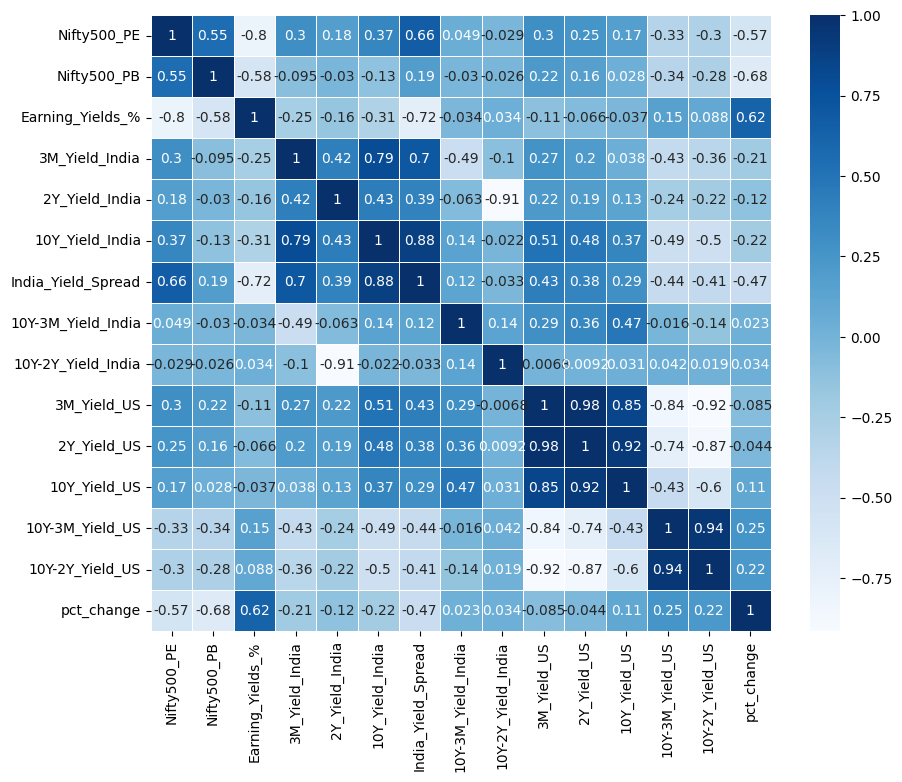

In [6]:
f = plt.figure(figsize=(10, 8))
_ = sns.heatmap(df.corr(), cmap="Blues", linewidths=0.5, linecolor='white', annot=True)
plt.show()

In [7]:
features = ['Nifty500_PE', 'Nifty500_PB', 'Earning_Yields_%',
            '3M_Yield_India', '2Y_Yield_India', '10Y_Yield_India',
            'India_Yield_Spread', '10Y-3M_Yield_India', '10Y-2Y_Yield_India',
            '3M_Yield_US', '2Y_Yield_US', '10Y_Yield_US', '10Y-3M_Yield_US',
            '10Y-2Y_Yield_US']

label = ['pct_change']

In [8]:
print('total features = ', len(features))

total features =  14


# distribution of each feature

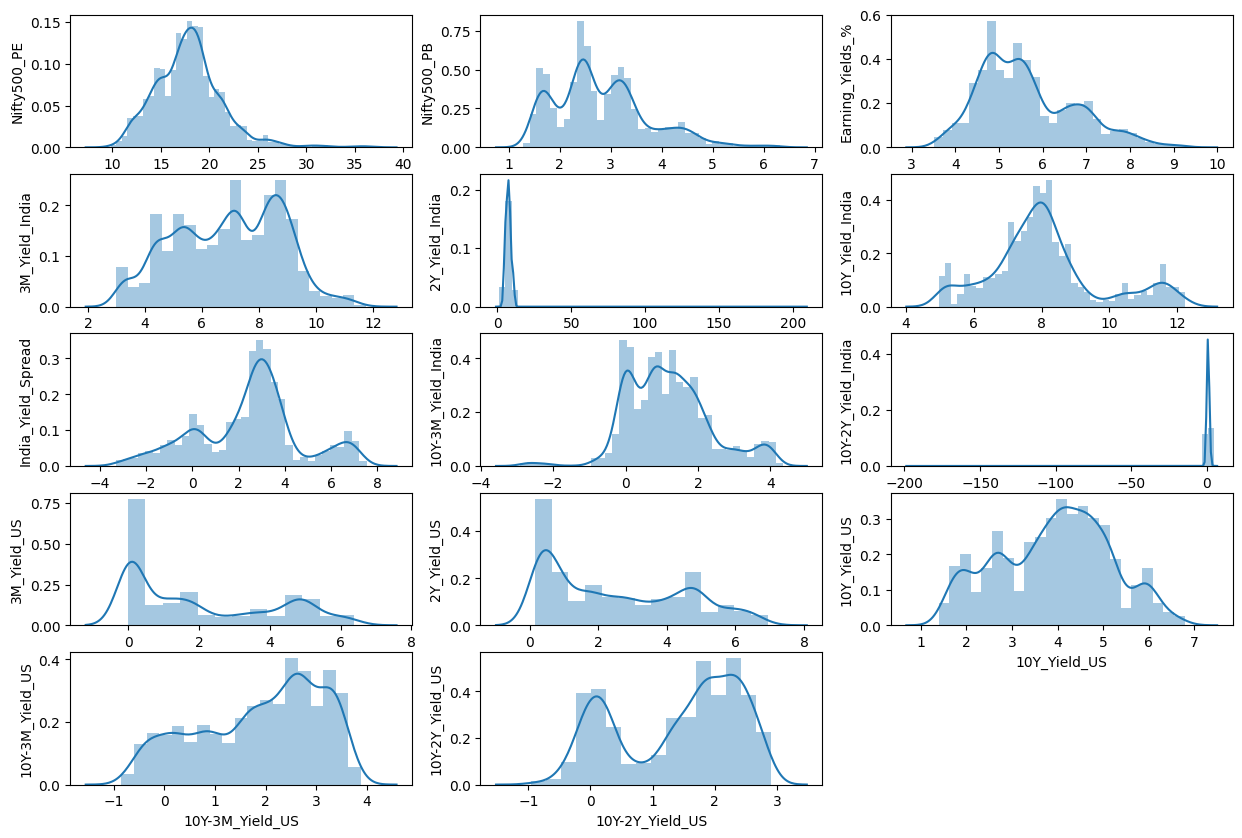

In [9]:
_ = plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.distplot(df[col])
    plt.ylabel(col)
plt.show()

lot of variability among the different features, few outliers can also be spotted

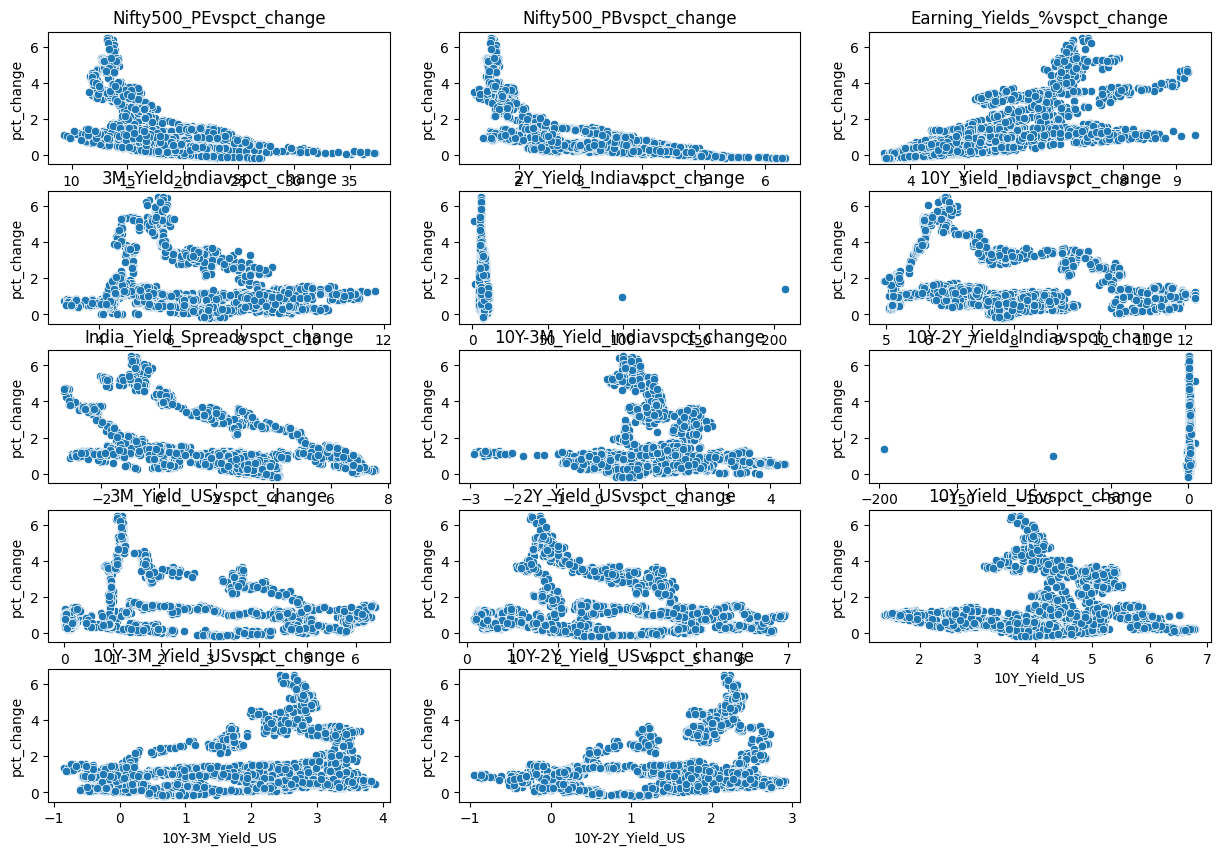

In [10]:
_ = plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df, x=col, y=label[0])
    plt.title('{}vs{}'.format(col, label[0]))
plt.show()

given the nature of above scatter plots it is evident that there is `no linear relation` between the target variable and features

# PCA - principal component analysis
this will help us to visualize high dimensional data in lower dimensions

Text(0, 0.5, 'second component')

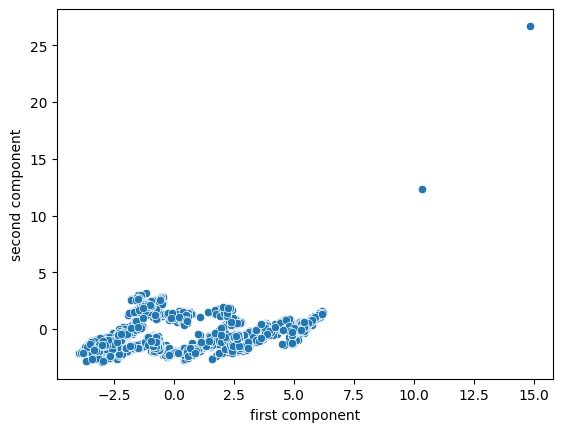

In [11]:
from sklearn.decomposition import PCA

# selecting the top 2 components which explains the maximum vairance
# pca = PCA(n_components=2)
pca = PCA()
X = df[features].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_transform = sc.fit_transform(X)
X_components = pca.fit_transform(X_transform)

sns.scatterplot(x=X_components[:, 0], y=X_components[:, 1])
plt.xlabel('first component')
plt.ylabel('second component')

In [12]:
variance_explained = [round(e, 2) for e in pca.explained_variance_ratio_]
print(variance_explained)
print("so the first two components are together explaining ~60% of the variance in the data")

[0.41, 0.19, 0.14, 0.11, 0.09, 0.03, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
so the first two components are together explaining ~60% of the variance in the data


# Linear regression
check the p-values of each feature, p-value >= 0.05 indicates that the null hypothesis cannot be rejected which is, that there is high prob. of seeing the same data if a given feature was not present

In [13]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = df[features].values
y = df[label[0]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     478.0
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:34:30   Log-Likelihood:                -3025.0
No. Observations:                2975   AIC:                             6080.
Df Residuals:                    2960   BIC:                             6170.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2066      0.012     98.145      0.0

r2 and adjusted r2 both are around 0.65, which is `not very exciting`, but looking at the p-values of the features, we say conclude that not all the features are super important if we choose to go with linear regeression

one more method to check the feature importance is illustrated below

# Permutation Importance
Permutation importance is calculated after a model has been fitted. It shows how much does a feature effect the predictions. It answers the following question. If we randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()

df = df.sample(frac=1)
X, y = df[features], df[label]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree_regressor.fit(X_train, y_train)

import eli5
from eli5.sklearn import PermutationImportance
pi = PermutationImportance(tree_regressor).fit(X_test, y_test)

eli5.show_weights(pi, feature_names=X_test.columns.tolist())

Weight,Feature
1.7123 ± 0.1964,Nifty500_PB
0.2450 ± 0.0907,10Y-2Y_Yield_US
0.1689 ± 0.0306,Earning_Yields_%
0.1448 ± 0.0149,10Y_Yield_India
0.1377 ± 0.0282,10Y-3M_Yield_US
0.1294 ± 0.0422,10Y-3M_Yield_India
0.0427 ± 0.0058,3M_Yield_India
0.0344 ± 0.0040,Nifty500_PE
0.0281 ± 0.0061,2Y_Yield_India
0.0260 ± 0.0056,2Y_Yield_US


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def r2_score_adjusted(y_true, y_pred, p):
    from sklearn.metrics import r2_score
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    n = len(y_pred)
    denom = n-p-1
    numer = (n-1)*(1-r2)
    return 1-(numer/denom)

def get_scores(y_pred, y_true, p=None, r2=True, mse=True, mae=True):
    if r2:
        print('r2 score = ', r2_score(y_pred=y_pred, y_true=y_true))
        print('adjusted r2 score = ', r2_score_adjusted(y_pred=y_pred, y_true=y_true, p=p))
    if mse:
        print('mean sqaured error = ', mean_squared_error(y_pred=y_pred, y_true=y_true))
    if mae:
        print('mean absolute error = ', mean_absolute_error(y_pred=y_pred, y_true=y_true))

In [16]:
y_pred = tree_regressor.predict(X_test)
get_scores(y_pred=y_pred, y_true=y_test, p=len(X_test.columns))

r2 score =  0.9833111650342737
adjusted r2 score =  0.982990666146043
mean sqaured error =  0.021934551961373873
mean absolute error =  0.05595596467836228


looks like are getting `decent accuracy` with Decison Tree

## Forward Selection

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

results = dict()
for i in range(1, len(features)+1):
    # add one feature at a time
    _features = features[:i]
    # shuffle the data
    X = df.sample(frac=1)
    X = df[_features]
    y = df[label[0]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # fitting decision tree
    tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
    tree_regressor.fit(X_train, y_train)
    y_pred = tree_regressor.predict(X_test)
    mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
    # keep track of mean squared error
    results[i] = mse

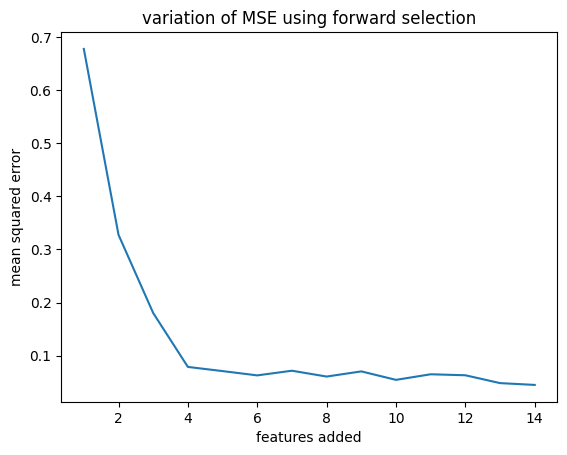

In [18]:
sns.lineplot(x=list(results.keys()), y=list(results.values()))
_ = plt.xlabel('features added')
_ = plt.ylabel('mean squared error')
_ = plt.title('variation of MSE using forward selection')

one of the method for selecting the features is using forward selection, we select the number of features which gives us minimum value of MSE

In [19]:
print('features selected = ', features[:6])

features selected =  ['Nifty500_PE', 'Nifty500_PB', 'Earning_Yields_%', '3M_Yield_India', '2Y_Yield_India', '10Y_Yield_India']


### Grid Search for Decision Tree
for selecting optimal values of hyper-parameters

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)

param_dict = {
    'max_depth': (3, 5, 10),
    'min_samples_split': (2, 3, 5),
    'min_samples_leaf': (1, 3, 5)
}

X, y = df[features], df[label]

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
grid_cv = GridSearchCV(estimator=tree_regressor,
                       n_jobs=-1,
                       param_grid=param_dict,
                       scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
                       refit=False,
                       cv=5,
                       verbose=1,
                       return_train_score=True)

grid_cv.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': (3, 5, 10), 'min_samples_leaf': (1, 3, 5),
                         'min_samples_split': (2, 3, 5)},
             refit=False, return_train_score=True,
             scoring=('neg_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'),
             verbose=1)

In [22]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)

cv_results = pd.DataFrame(grid_cv.cv_results_)
cv_results.sort_values(['rank_test_r2'], inplace=True)

In [23]:
cv_results.iloc[0]['params']

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

### K-fold cross validation on Decision Tree
keeping k=5

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=10,
                                       min_samples_leaf=1,
                                       min_samples_split=5)

from sklearn.model_selection import KFold
k_folds = KFold(n_splits=5, shuffle=True)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[features].values
y = df[label[0]].values

scores = list()
k = 0
for train_index, test_index in k_folds.split(X):
    k += 1
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    tree_regressor.fit(X_train, y_train)
    y_pred = tree_regressor.predict(X_test)
    y_pred_train = tree_regressor.predict(X_train)
    mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
    mse_test = mean_squared_error(y_pred=y_pred, y_true=y_test)
    mae_train = mean_absolute_error(y_pred=y_pred_train, y_true=y_train)
    mae_test = mean_absolute_error(y_pred=y_pred, y_true=y_test)
    r2_train = r2_score(y_pred=y_pred_train, y_true=y_train)
    r2_test = r2_score(y_pred=y_pred, y_true=y_test)
    scores.append({
        'mse_train': mse_train,
        'mse_test': mse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train':r2_train,
        'r2_test': r2_test,
        'k': k
    })
pd.DataFrame(scores)

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,k
0,0.003804,0.052207,0.039751,0.080990,0.997314,0.964637,1
1,0.003487,0.027682,0.038300,0.077209,0.997506,0.982141,2
2,0.002487,0.008362,0.033769,0.057523,0.998237,0.994434,3
3,0.002539,0.011352,0.033638,0.060592,0.998284,0.990674,4
4,0.003570,0.021732,0.037275,0.068493,0.997521,0.984275,5
